In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

In [18]:
%matplotlib inline

In [96]:
data = pd.read_csv("gdscjmi-hack-placements/train.csv")
data.drop("sl_no",axis=1,inplace=True)

In [9]:
data.profile_report(title='Campus placement information',progress_bar=False)

In [37]:
print(data.head(5))
print(data.shape)

   gender  10th_marks  12th_marks 10th_board 12th_board 12th_stream  \
0    Male        54.2        63.0    Central     Others     Science   
1  Female        67.0        53.0    Central    Central     Science   
2  Female        60.0        63.0    Central    Central        Arts   
3  Female        75.4        60.5     Others    Central     Science   
4    Male        49.0        39.0     Others    Central     Science   

  undergrad_type  undergrad_marks     specialisation  mba_marks  \
0       Commerce             58.0       Marketing&HR      58.44   
1    Engineering             65.0       Marketing&HR      58.32   
2         Others             56.0       Marketing&HR      56.63   
3    Engineering             84.0  Marketing&Finance      65.25   
4         Others             65.0  Marketing&Finance      51.21   

  work_experience  preplacement_test_marks      status  
0              No                     79.0  Not Placed  
1              No                     64.0  Not Placed  

### Outlier Detection

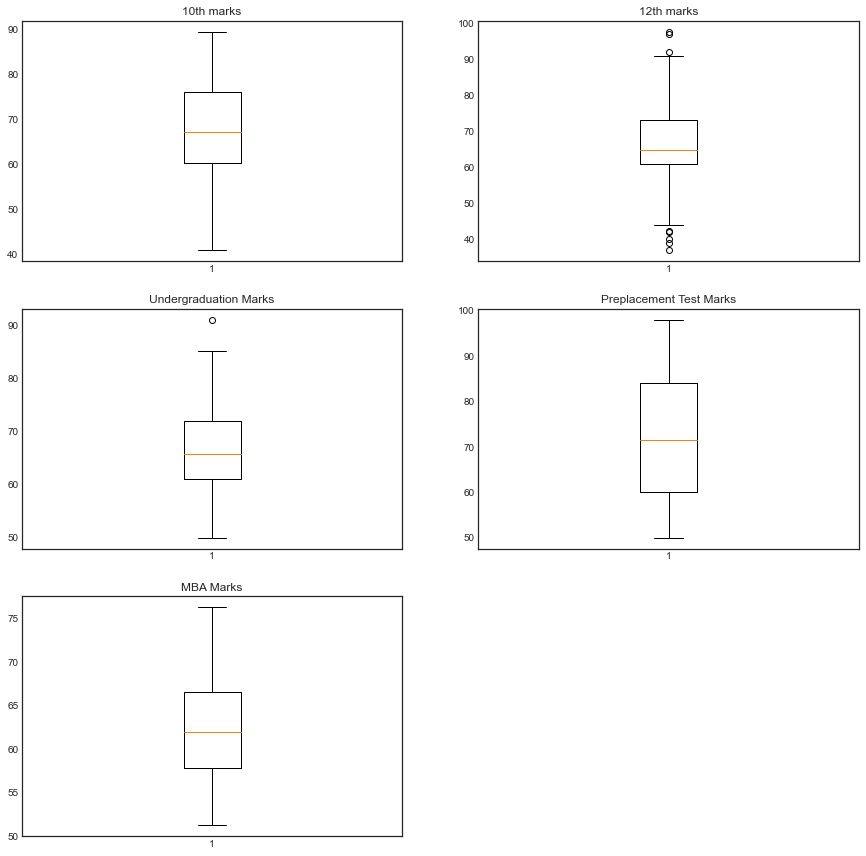

In [26]:
plt.figure(figsize=(15,15))
plt.style.use('seaborn-white')

ax = plt.subplot(3,2,1)
plt.boxplot(data['10th_marks'])
ax.set_title('10th marks')

ax = plt.subplot(3,2,2)
plt.boxplot(data['12th_marks'])
ax.set_title('12th marks')

ax = plt.subplot(3,2,3)
plt.boxplot(data['undergrad_marks'])
ax.set_title('Undergraduation Marks')

ax = plt.subplot(3,2,4)
plt.boxplot(data['preplacement_test_marks'])
ax.set_title('Preplacement Test Marks')

ax = plt.subplot(3,2,5)
plt.boxplot(data['mba_marks'])
ax.set_title("MBA Marks")

plt.show()

In [32]:
Q1 = data['12th_marks'].quantile(0.25)
Q3 = data['12th_marks'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (data['12th_marks'] >= Q1 - 1.5 * IQR) & (data['12th_marks'] <= Q3 + 1.5 *IQR)
print(filter)
data_filter=data.loc[filter]
data_filter

0       True
1       True
2       True
3       True
4      False
       ...  
167     True
168     True
169     True
170     True
171     True
Name: 12th_marks, Length: 172, dtype: bool


,gender,10th_marks,12th_marks,10th_board,12th_board,12th_stream,undergrad_type,undergrad_marks,specialisation,mba_marks,work_experience,preplacement_test_marks,status
0,Male,54.2,63.0,Central,Others,Science,Commerce,58.0,Marketing&HR,58.44,No,79.00,Not Placed
1,Female,67.0,53.0,Central,Central,Science,Engineering,65.0,Marketing&HR,58.32,No,64.00,Not Placed
2,Female,60.0,63.0,Central,Central,Arts,Others,56.0,Marketing&HR,56.63,Yes,80.00,Placed
3,Female,75.4,60.5,Others,Central,Science,Engineering,84.0,Marketing&Finance,65.25,No,98.00,Placed
5,Male,64.0,80.0,Others,Others,Science,Engineering,65.0,Marketing&Finance,57.65,Yes,69.00,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Female,69.0,62.0,Others,Others,Commerce,Commerce,69.0,Marketing&HR,62.35,Yes,67.00,Placed
168,Male,63.0,62.0,Others,Others,Science,Engineering,65.0,Marketing&HR,60.69,No,87.50,Not Placed
169,Male,80.6,82.0,Others,Others,Commerce,Commerce,77.6,Marketing&Finance,74.49,No,91.00,Placed
170,Male,52.0,55.0,Others,Others,Commerce,Commerce,56.3,Marketing&Finance,64.74,No,59.00,Not Placed


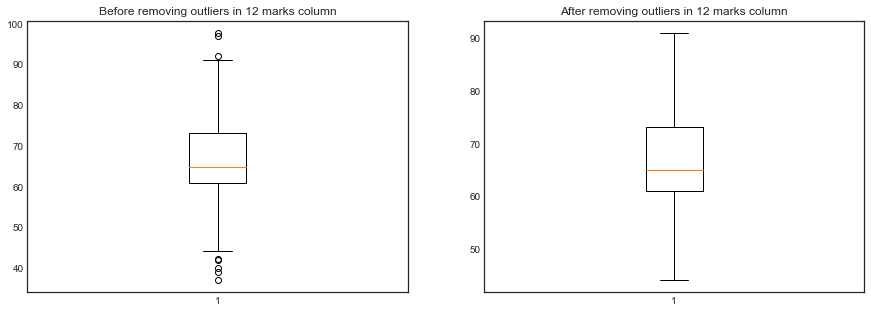

In [31]:
plt.figure(figsize = (15, 5))
plt.style.use('seaborn-white')


ax=plt.subplot(1,2,1)
plt.boxplot(data['12th_marks'])
ax.set_title('Before removing outliers in 12 marks column')
ax=plt.subplot(122)
plt.boxplot(data_new['12th_marks'])
ax.set_title('After removing outliers in 12 marks column')

plt.show()

## All relations between numbers

<AxesSubplot:>

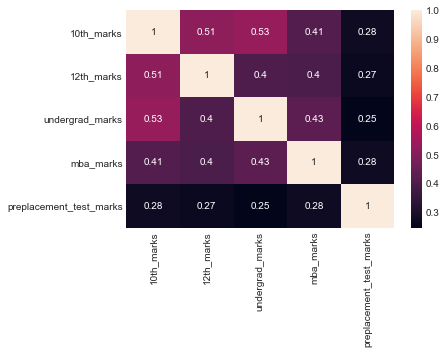

In [59]:
p=data.corr()
sns.heatmap(p,annot=True)

## Vizualizing individual features

### Predict if Gender Affects Placements ?

In [60]:
data['gender'].value_counts()

Male      108
Female     64
Name: gender, dtype: int64

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


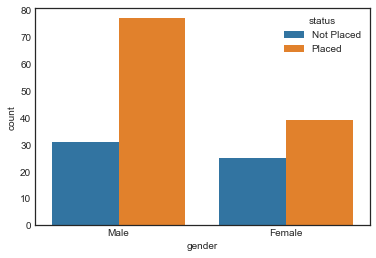

<Figure size 1440x1440 with 0 Axes>

In [61]:
sns.countplot('gender',hue='status',data=data)
plt.figure(figsize = (20, 20))
plt.show()

#### Result - Male students are more likely to get placed than Female students

### Predict if 10th marks and 10th board affects placements

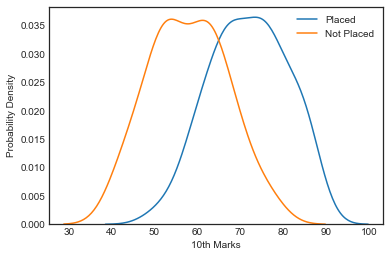

In [62]:
sns.kdeplot(data['10th_marks'][ data.status=="Placed"])
sns.kdeplot(data['10th_marks'][ data.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("10th Marks")
plt.ylabel("Probability Density")
plt.show()

#### Result - Students with good 10th marks are more likely to get placed`

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


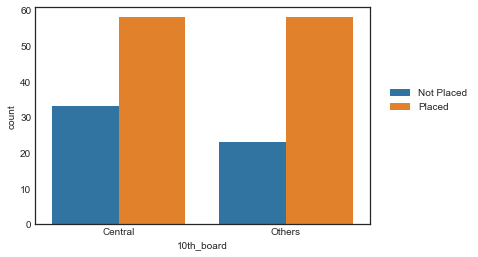

In [72]:
sns.countplot("10th_board", hue="status", data=data)
plt.legend(loc=(1.05, 0.5))
plt.show()


#### Result - This doesn't affect much

### Predict if 12th marks, 12th stream and 12th board affects placements

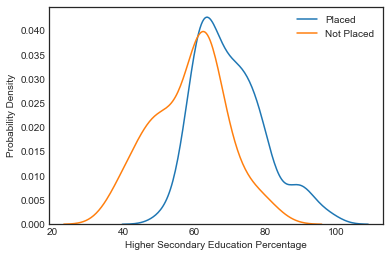

In [63]:
sns.kdeplot(data['12th_marks'][ data.status=="Placed"])
sns.kdeplot(data['12th_marks'][ data.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Higher Secondary Education Percentage")
plt.ylabel("Probability Density")
plt.show()

#### Result - Accurate result not that clear but you need atleast but there should be atleast more than 65 marks to get placed

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


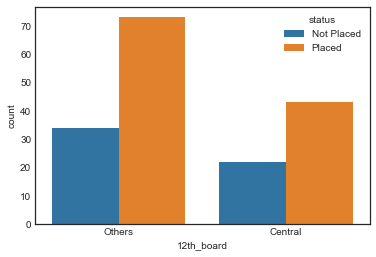

In [73]:
sns.countplot("12th_board", hue="status", data=data)
plt.show()

#### Result - Doesn't affects much but student with other board are more likely to get placed. 

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


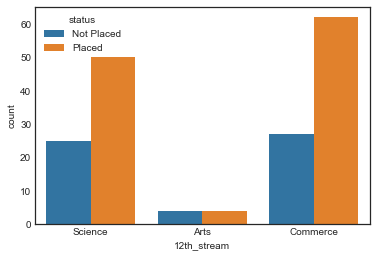

In [74]:
sns.countplot("12th_stream", hue="status", data=data)
plt.show()

#### Result - Much less data for arts in comparison to commerce and science but commerce students are likely to get plcaed more but not placed in commerce and science are nearly equal.

### Predict if under graduation marks and undergrad type affect placements

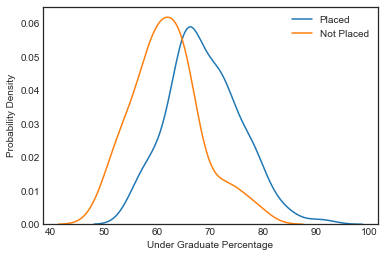

In [64]:
sns.kdeplot(data['undergrad_marks'][ data.status=="Placed"])
sns.kdeplot(data['undergrad_marks'][ data.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Under Graduate Percentage")
plt.ylabel("Probability Density")
plt.show()

#### Result - Overlapping here. But you need atleast 50 marks to get placed

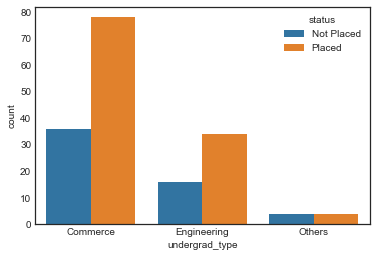

In [76]:
sns.countplot("undergrad_type", hue="status", data=data)
plt.show()

#### Result - Less data for others stream. but commerce students are more likely to get placed

### Predict if work experience affect placements

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


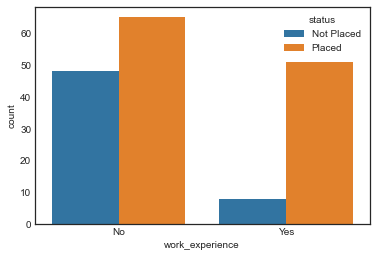

In [65]:
sns.countplot("work_experience", hue="status", data=data)
plt.show()

#### Result - Very few students having work experience not placed, where as there's no large difference between placed or not placed when there is no work experience

### Predict if Placement test marks affects placements 

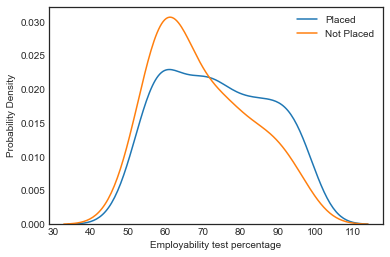

In [66]:
sns.kdeplot(data['preplacement_test_marks'][ data.status=="Placed"])
sns.kdeplot(data['preplacement_test_marks'][ data.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Employability test percentage")
plt.ylabel("Probability Density")
plt.show()

#### Result - Students with more than 80 marks are more likely to get placed but there no clear answer for this

### Predict if specialisation affects placements 

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


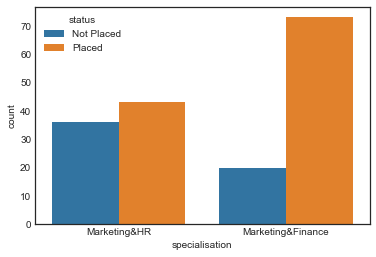

In [68]:
sns.countplot("specialisation", hue="status", data=data)
plt.show()

#### Result - Students in marketing and finance less likely to get not placed

### Predict - Predict if MBA marks affects placements

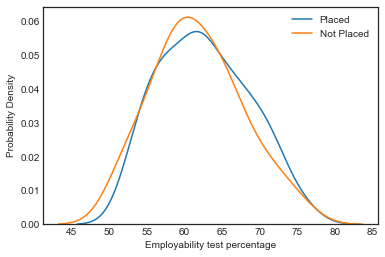

In [69]:
sns.kdeplot(data['mba_marks'][ data.status=="Placed"])
sns.kdeplot(data['mba_marks'][ data.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Employability test percentage")
plt.ylabel("Probability Density")
plt.show()

#### Result - It's overlapping so much so we can't say anything. 

In [97]:
data

,gender,10th_marks,12th_marks,10th_board,12th_board,12th_stream,undergrad_type,undergrad_marks,specialisation,mba_marks,work_experience,preplacement_test_marks,status
0,Male,54.2,63.0,Central,Others,Science,Commerce,58.0,Marketing&HR,58.44,No,79.00,Not Placed
1,Female,67.0,53.0,Central,Central,Science,Engineering,65.0,Marketing&HR,58.32,No,64.00,Not Placed
2,Female,60.0,63.0,Central,Central,Arts,Others,56.0,Marketing&HR,56.63,Yes,80.00,Placed
3,Female,75.4,60.5,Others,Central,Science,Engineering,84.0,Marketing&Finance,65.25,No,98.00,Placed
4,Male,49.0,39.0,Others,Central,Science,Others,65.0,Marketing&Finance,51.21,No,63.00,Not Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Female,69.0,62.0,Others,Others,Commerce,Commerce,69.0,Marketing&HR,62.35,Yes,67.00,Placed
168,Male,63.0,62.0,Others,Others,Science,Engineering,65.0,Marketing&HR,60.69,No,87.50,Not Placed
169,Male,80.6,82.0,Others,Others,Commerce,Commerce,77.6,Marketing&Finance,74.49,No,91.00,Placed
170,Male,52.0,55.0,Others,Others,Commerce,Commerce,56.3,Marketing&Finance,64.74,No,59.00,Not Placed


## Result - We will consider all features except 12th board and 10th board as they are unlikely to affect placements

In [98]:
data_final = data.drop(['10th_board','12th_board'],axis=1)
print(data_final)

     gender  10th_marks  12th_marks 12th_stream undergrad_type  \
0      Male        54.2        63.0     Science       Commerce   
1    Female        67.0        53.0     Science    Engineering   
2    Female        60.0        63.0        Arts         Others   
3    Female        75.4        60.5     Science    Engineering   
4      Male        49.0        39.0     Science         Others   
..      ...         ...         ...         ...            ...   
167  Female        69.0        62.0    Commerce       Commerce   
168    Male        63.0        62.0     Science    Engineering   
169    Male        80.6        82.0    Commerce       Commerce   
170    Male        52.0        55.0    Commerce       Commerce   
171    Male        84.0        90.9     Science    Engineering   

     undergrad_marks     specialisation  mba_marks work_experience  \
0               58.0       Marketing&HR      58.44              No   
1               65.0       Marketing&HR      58.32              No 

In [99]:
data_final.head()

,gender,10th_marks,12th_marks,12th_stream,undergrad_type,undergrad_marks,specialisation,mba_marks,work_experience,preplacement_test_marks,status
0,Male,54.2,63.0,Science,Commerce,58.0,Marketing&HR,58.44,No,79.0,Not Placed
1,Female,67.0,53.0,Science,Engineering,65.0,Marketing&HR,58.32,No,64.0,Not Placed
2,Female,60.0,63.0,Arts,Others,56.0,Marketing&HR,56.63,Yes,80.0,Placed
3,Female,75.4,60.5,Science,Engineering,84.0,Marketing&Finance,65.25,No,98.0,Placed
4,Male,49.0,39.0,Science,Others,65.0,Marketing&Finance,51.21,No,63.0,Not Placed


## Convert all Categorical features into numerical features through mapping

In [100]:
data_final["gender"] = data_final.gender.map({"Male":0,"Female":1})
data_final["12th_stream"] = data_final['12th_stream'].map({"Commerce":0,"Science":1,"Arts":2})
data_final["undergrad_type"] = data_final.undergrad_type.map({"Commerce":0,"Engineering":1, "Others":2})
data_final["work_experience"] = data_final.work_experience.map({"No":0, "Yes":1})
data_final["status"] = data_final.status.map({"Not Placed":0, "Placed":1})
data_final["specialisation"] = data_final.specialisation.map({"Marketing&HR":0, "Marketing&Finance":1})

# Algorithm Chosen 

## We will choose Decision Tree Classifier to build the model that will predict status

## We choosing this algorithm because it doesn't affect by the outliers, as we have seen some outliers in out data in 12th marks. 

In [101]:
data_final

,gender,10th_marks,12th_marks,12th_stream,undergrad_type,undergrad_marks,specialisation,mba_marks,work_experience,preplacement_test_marks,status
0,0,54.2,63.0,1,0,58.0,0,58.44,0,79.00,0
1,1,67.0,53.0,1,1,65.0,0,58.32,0,64.00,0
2,1,60.0,63.0,2,2,56.0,0,56.63,1,80.00,1
3,1,75.4,60.5,1,1,84.0,1,65.25,0,98.00,1
4,0,49.0,39.0,1,2,65.0,1,51.21,0,63.00,0
...,...,...,...,...,...,...,...,...,...,...,...
167,1,69.0,62.0,0,0,69.0,0,62.35,1,67.00,1
168,0,63.0,62.0,1,1,65.0,0,60.69,0,87.50,0
169,0,80.6,82.0,0,0,77.6,1,74.49,0,91.00,1
170,0,52.0,55.0,0,0,56.3,1,64.74,0,59.00,0


In [102]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [104]:
X = data_final[['gender', '10th_marks', '12th_marks', '12th_stream', 'undergrad_type', 'undergrad_marks','mba_marks', 'specialisation', 'work_experience','preplacement_test_marks']]
y = data_final['status']


In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [106]:
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

In [110]:
X_train

,gender,10th_marks,12th_marks,12th_stream,undergrad_type,undergrad_marks,mba_marks,specialisation,work_experience,preplacement_test_marks
17,0,62.0,60.33,1,1,64.21,60.02,0,0,63.00
90,0,65.0,68.00,2,0,64.00,57.80,1,0,75.00
136,0,67.0,71.00,1,2,64.33,61.26,0,1,64.00
4,0,49.0,39.00,1,2,65.00,51.21,1,0,63.00
157,1,61.0,81.00,0,0,66.40,62.21,0,0,50.89
...,...,...,...,...,...,...,...,...,...,...
116,0,76.0,80.00,1,1,78.00,70.48,0,1,97.00
144,1,77.0,73.00,0,0,81.00,69.70,1,1,89.00
95,1,75.2,73.20,1,0,68.40,62.98,0,0,65.00
13,1,69.7,47.00,0,1,72.70,59.24,0,0,79.00


In [114]:
X_test.shape

(52, 10)

In [111]:

print(X_test)

,gender,10th_marks,12th_marks,12th_stream,undergrad_type,undergrad_marks,mba_marks,specialisation,work_experience,preplacement_test_marks
93,0,84.20,69.40,1,1,65.00,52.72,0,1,80.00
126,0,61.00,62.00,0,0,65.00,56.81,1,0,62.00
33,1,64.00,73.50,0,0,73.00,56.70,0,0,52.00
88,1,86.50,64.20,1,1,67.40,59.69,1,0,59.00
7,0,60.40,66.60,1,0,65.00,52.71,0,0,71.00
169,0,80.60,82.00,0,0,77.60,74.49,1,0,91.00
54,1,84.00,73.00,0,0,73.00,73.33,1,0,75.00
30,0,71.00,79.00,0,0,66.00,57.55,1,1,94.00
130,0,80.92,78.50,0,0,67.00,60.99,1,0,68.71
43,0,63.00,62.00,0,0,68.00,62.46,1,0,64.00


In [115]:
y_test.shape

(52,)

In [112]:
y_test

93     1
126    1
33     1
88     1
7      1
169    1
54     1
30     1
130    1
43     1
114    0
29     1
62     1
164    1
150    0
156    1
127    1
16     1
15     1
5      1
134    1
111    1
106    1
26     0
81     0
141    1
69     0
72     0
52     0
170    0
107    1
71     1
73     0
120    0
24     1
162    0
121    1
31     0
87     1
140    1
143    1
1      0
122    1
75     0
56     1
86     1
76     1
11     1
161    1
49     1
155    1
21     1
Name: status, dtype: int64

In [116]:
y_train.shape

(120,)

In [113]:
y_train

17     0
90     1
136    1
4      0
157    1
      ..
116    1
144    1
95     1
13     0
8      0
Name: status, Length: 120, dtype: int64

In [109]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [107]:
accuracy_score(y_test, y_pred)

0.9230769230769231

In [108]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       0.93      0.97      0.95        38

    accuracy                           0.92        52
   macro avg       0.92      0.88      0.90        52
weighted avg       0.92      0.92      0.92        52



## Now test our test data

#### First let refine it

In [138]:
data_test = pd.read_csv('gdscjmi-hack-placements/test.csv')

In [139]:
data_test

,sl_no,gender,10th_marks,12th_marks,10th_board,12th_board,12th_stream,undergrad_type,undergrad_marks,specialisation,mba_marks,work_experience,preplacement_test_marks
0,8,Male,82.00,64.00,Central,Central,Science,Engineering,66.00,Marketing&Finance,62.14,Yes,67.00
1,70,Male,73.00,73.00,Central,Central,Science,Engineering,66.00,Marketing&Finance,68.07,Yes,70.00
2,160,Male,52.00,49.00,Central,Others,Commerce,Commerce,58.00,Marketing&HR,60.59,No,62.00
3,99,Female,69.00,73.00,Central,Central,Commerce,Commerce,65.00,Marketing&Finance,57.31,No,70.00
4,88,Male,59.60,51.00,Central,Central,Science,Others,60.00,Marketing&HR,59.08,No,75.00
5,28,Male,63.00,67.00,Others,Others,Commerce,Commerce,66.00,Marketing&HR,57.69,No,68.00
6,196,Male,66.00,76.00,Central,Central,Commerce,Commerce,72.00,Marketing&HR,58.95,Yes,84.00
7,174,Female,52.00,52.00,Others,Others,Science,Engineering,55.00,Marketing&HR,59.32,No,67.00
8,152,Male,65.00,65.00,Central,Central,Commerce,Commerce,75.00,Marketing&Finance,58.87,No,83.00
9,102,Male,63.00,72.00,Central,Central,Commerce,Commerce,68.00,Marketing&HR,60.44,No,78.00


In [140]:
sl_no = data_test['sl_no']

In [145]:
data_test.drop("12th_board",axis=1,inplace=True)

In [142]:
data_test["gender"] = data_test.gender.map({"Male":0,"Female":1})
data_test["12th_stream"] = data_test['12th_stream'].map({"Commerce":0,"Science":1,"Arts":2})
data_test["undergrad_type"] = data_test.undergrad_type.map({"Commerce":0,"Engineering":1, "Others":2})
data_test["work_experience"] = data_test.work_experience.map({"No":0, "Yes":1})
data_test["specialisation"] = data_test.specialisation.map({"Marketing&HR":0, "Marketing&Finance":1})


In [146]:
data_test

,gender,10th_marks,12th_marks,12th_stream,undergrad_type,undergrad_marks,specialisation,mba_marks,work_experience,preplacement_test_marks
0,0,82.00,64.00,1,1,66.00,1,62.14,1,67.00
1,0,73.00,73.00,1,1,66.00,1,68.07,1,70.00
2,0,52.00,49.00,0,0,58.00,0,60.59,0,62.00
3,1,69.00,73.00,0,0,65.00,1,57.31,0,70.00
4,0,59.60,51.00,1,2,60.00,0,59.08,0,75.00
5,0,63.00,67.00,0,0,66.00,0,57.69,0,68.00
6,0,66.00,76.00,0,0,72.00,0,58.95,1,84.00
7,1,52.00,52.00,1,1,55.00,0,59.32,0,67.00
8,0,65.00,65.00,0,0,75.00,1,58.87,0,83.00
9,0,63.00,72.00,0,0,68.00,0,60.44,0,78.00


In [159]:
predictions = dtree.predict(data_test)

In [160]:
predictions

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1],
      dtype=int64)

In [161]:
predictions = list(predictions)

In [163]:
for i in range(len(predictions)):
    if predictions[i] == 0:
        predictions[i] = "Not Placed"
    else:
        predictions[i] = "Placed"

In [164]:
predictions

['Placed',
 'Placed',
 'Not Placed',
 'Placed',
 'Not Placed',
 'Placed',
 'Placed',
 'Not Placed',
 'Placed',
 'Placed',
 'Placed',
 'Placed',
 'Placed',
 'Placed',
 'Not Placed',
 'Placed',
 'Not Placed',
 'Not Placed',
 'Placed',
 'Not Placed',
 'Placed',
 'Placed',
 'Placed',
 'Placed',
 'Placed',
 'Placed',
 'Placed',
 'Placed',
 'Placed',
 'Placed',
 'Not Placed',
 'Placed',
 'Not Placed',
 'Placed',
 'Not Placed',
 'Placed',
 'Placed',
 'Placed',
 'Placed',
 'Placed',
 'Placed',
 'Not Placed',
 'Placed']

In [169]:
Final_result = pd.DataFrame({'sl_no':sl_no,'status':predictions})

TypeError: Index(...) must be called with a collection of some kind, False was passed

In [170]:
Final_result

,sl_no,status
0,8,Placed
1,70,Placed
2,160,Not Placed
3,99,Placed
4,88,Not Placed
5,28,Placed
6,196,Placed
7,174,Not Placed
8,152,Placed
9,102,Placed


In [171]:
Final_result.to_csv('result.csv',index=False)